In [0]:
import numpy as np
import pandas as pd

In [0]:
data=pd.read_csv(r'/content/drive/My Drive/owid-covid-data.csv')

In [99]:
data.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')

In [0]:
data=data[data['location']=='India']

In [101]:
data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8560,IND,India,2019-12-31,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8561,IND,India,2020-01-01,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8562,IND,India,2020-01-02,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8563,IND,India,2020-01-03,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8564,IND,India,2020-01-04,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [102]:
data.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8702,IND,India,2020-05-22,118447,6088,3583,148,85.831,4.412,2.596,0.107,2719434.0,103514.0,1.971,0.075,97069.0,0.070,samples tested,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8703,IND,India,2020-05-23,125101,6654,3720,137,90.653,4.822,2.696,0.099,2834798.0,115364.0,2.054,0.084,100074.0,0.073,samples tested,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8704,IND,India,2020-05-24,131868,6767,3867,147,95.556,4.904,2.802,0.107,2943421.0,108623.0,2.133,0.079,102254.0,0.074,samples tested,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8705,IND,India,2020-05-25,138845,6977,4021,154,100.612,5.056,2.914,0.112,3033591.0,90170.0,2.198,0.065,104400.0,0.076,samples tested,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8706,IND,India,2020-05-26,145380,6535,4167,146,105.347,4.735,3.020,0.106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")
import datetime as dt

In [0]:
data['date']=pd.to_datetime(data['date'])

## Number of cases

### Date-wise total number of cases

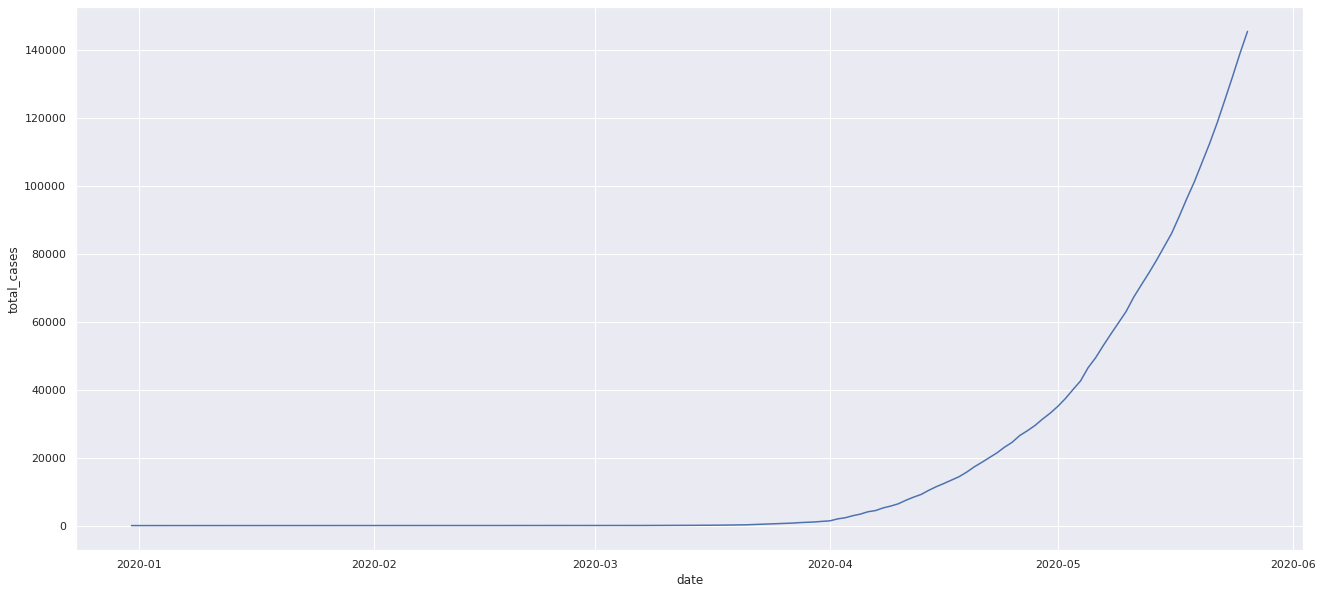

In [105]:
plt.figure(figsize=(22,10))
fig=sns.lineplot(x="date", y="total_cases",data=data)
plt.show()

- Total number of cases have increases almost exponentially after the lockdown measures have been eased across several states.
- Another reason for this increase in total cases might be due to the increase in testing.

### Date-wise new cases

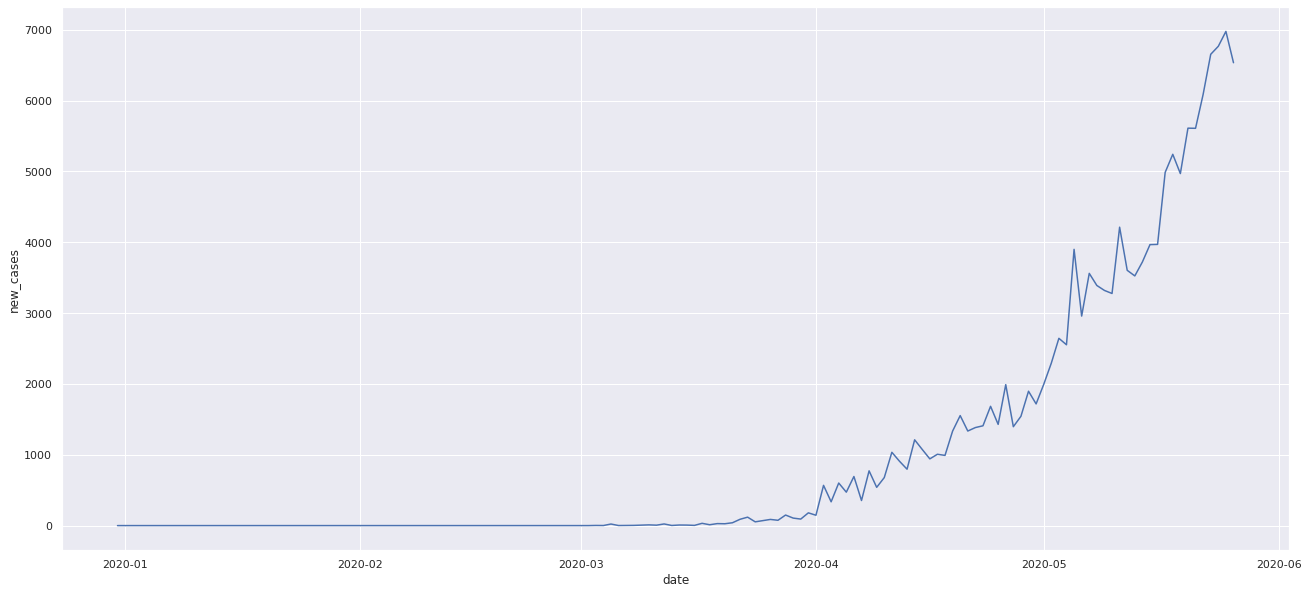

In [106]:
plt.figure(figsize=(22,10))
fig=sns.lineplot(x="date", y="new_cases",data=data)
plt.show()

- The number of new cases reported in a day have also increased consistently from April 2020 but a sharp increase in the number of new cases can be seen in the month of may.
- Reasons for this sharp increase in the number of new cases reported in a day is because of relaxation of lockdowns and also because of increased testing.

## Number of tests being done

### Date-wise total number of tests

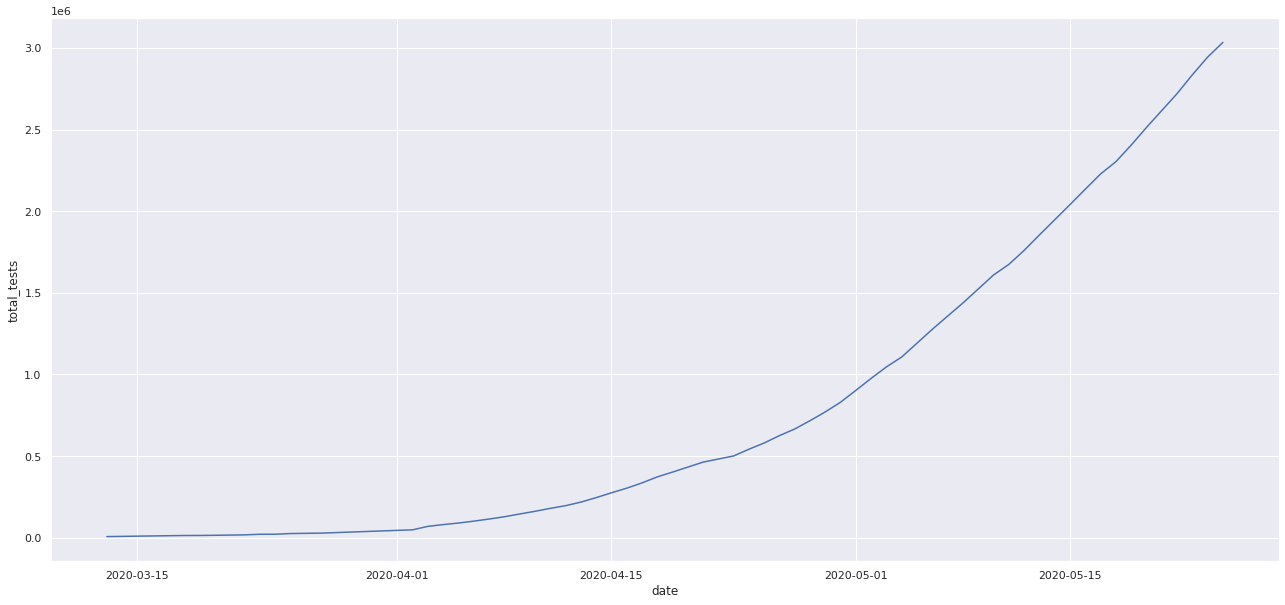

In [107]:
plt.figure(figsize=(22,10))
fig=sns.lineplot(x="date", y="total_tests",data=data)
plt.show()

- The total number of tests can increased almost linearly starting from mid April.
- But the total number of tests doesn't provide us with any clear picture about the statistics.

### Date-wise new tests performed

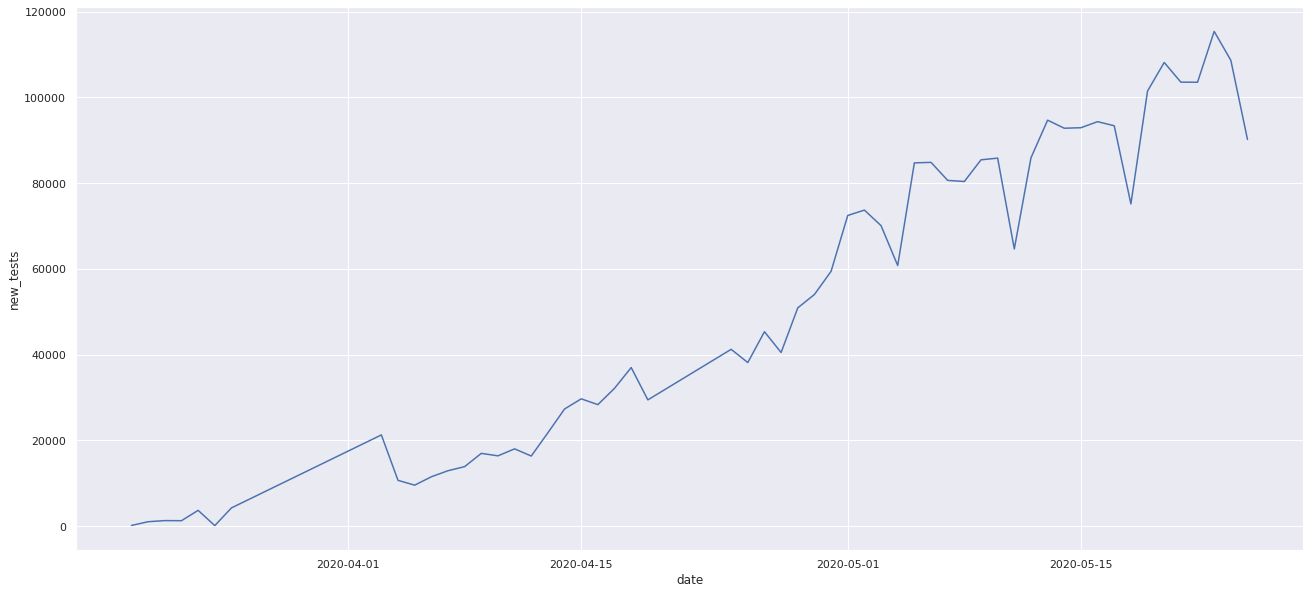

In [108]:
plt.figure(figsize=(22,10))
fig=sns.lineplot(x="date", y="new_tests",data=data)
plt.show()

- This graph clearly shows that the number of new tests being done in a day is consistently on a rise.
- Around May end, India will be conducting around 1-1.2 Lakhs new tests per day.

### Date-wise number of tests per thousand people

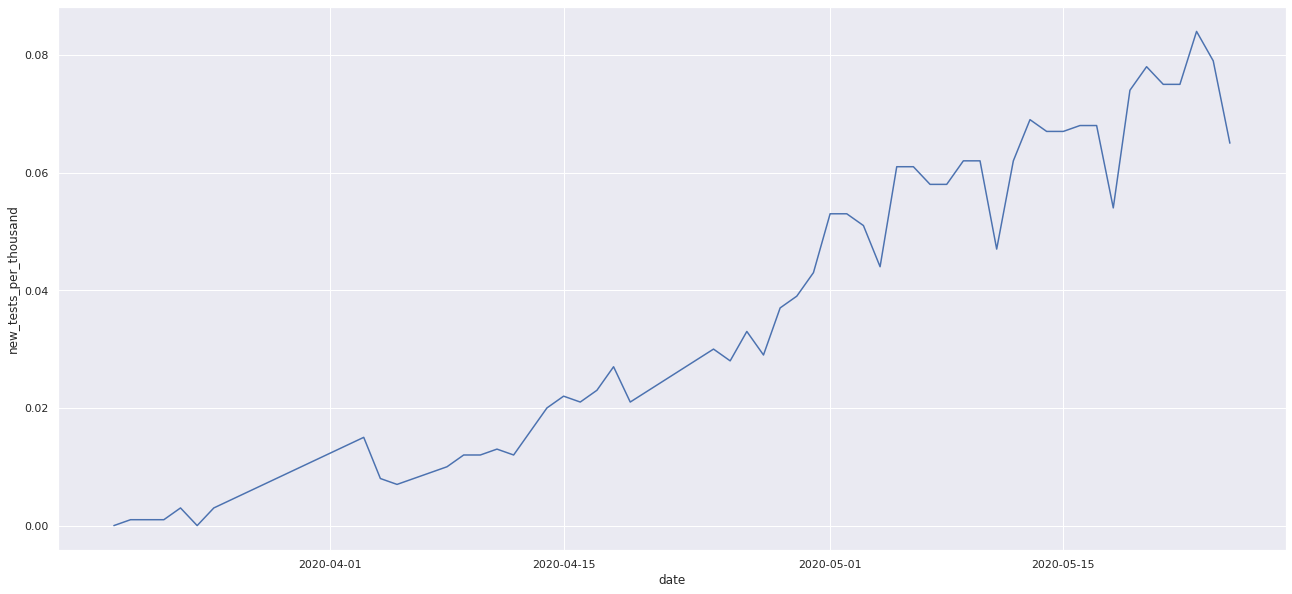

In [109]:
plt.figure(figsize=(22,10))
fig=sns.lineplot(x="date", y="new_tests_per_thousand",data=data)
plt.show()

- This graph also shows that the number of tests being done are on a rise with presently around 80 out of every 1000 people being tested.

## Tests vs Cases

### Toatl tests vs total number of cases

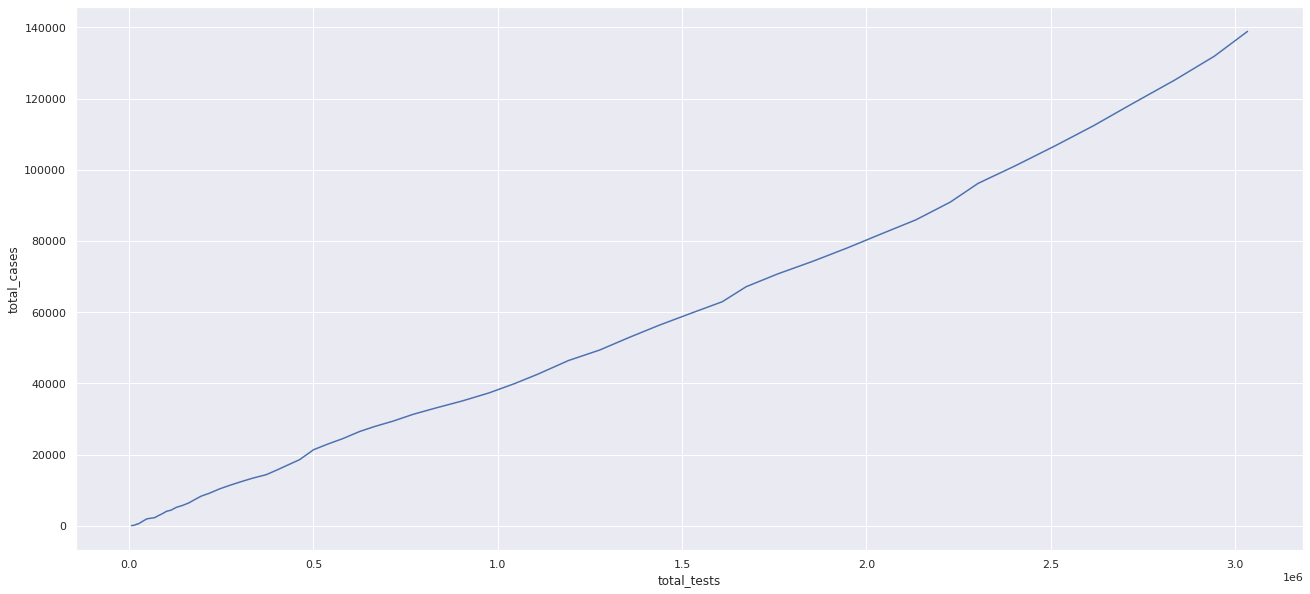

In [110]:
plt.figure(figsize=(22,10))
fig=sns.lineplot(x="total_tests", y="total_cases",data=data)
plt.show()

- This graph shows an almost linear relationship between the total number of tests done and the total number of cases.

### New tests done vs new cases reported

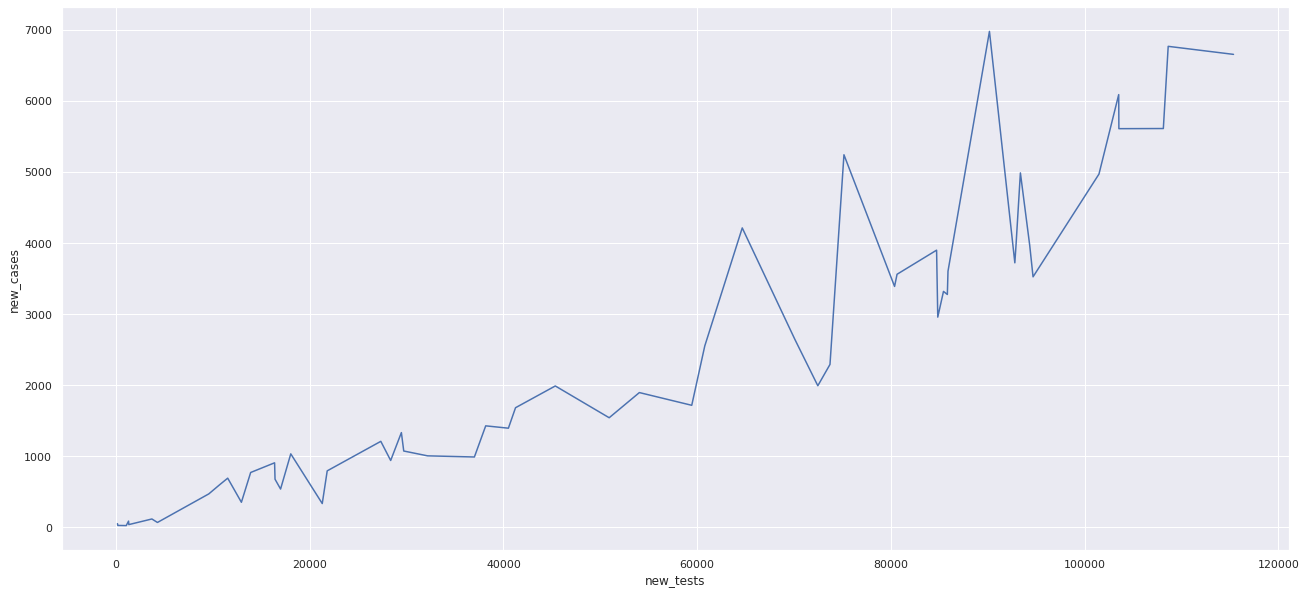

In [111]:
plt.figure(figsize=(22,10))
fig=sns.lineplot(x="new_tests", y="new_cases",data=data)
plt.show()

- This graph clearly shows that as the new tests done are being increased we are observing an increase in the new cases being found.
 -Thus we can expect if the number of tests being done are incresed further we'll see a rise in the number of cases as well.

## Deaths due to Covid-19

### Date-wise total deaths

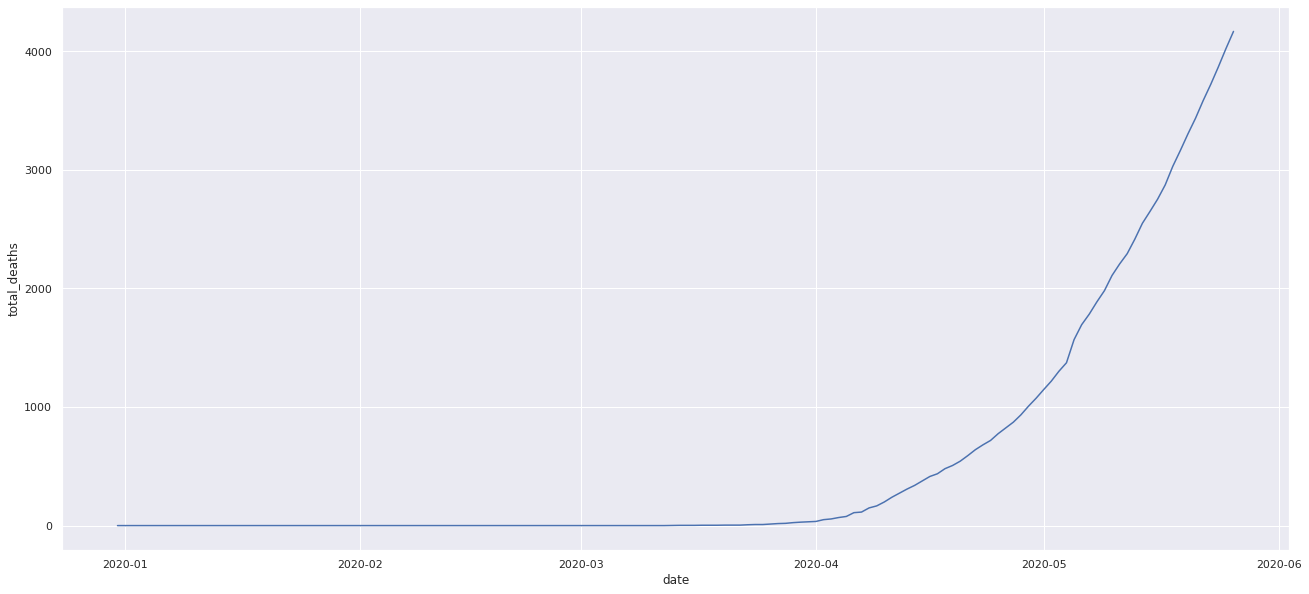

In [112]:
plt.figure(figsize=(22,10))
fig=sns.lineplot(x="date", y="total_deaths",data=data)
plt.show()

- As obvious this graph shows that the total number of deaths due to Covid-19 has increased sharply in the month of May.

### Date-wise new deaths

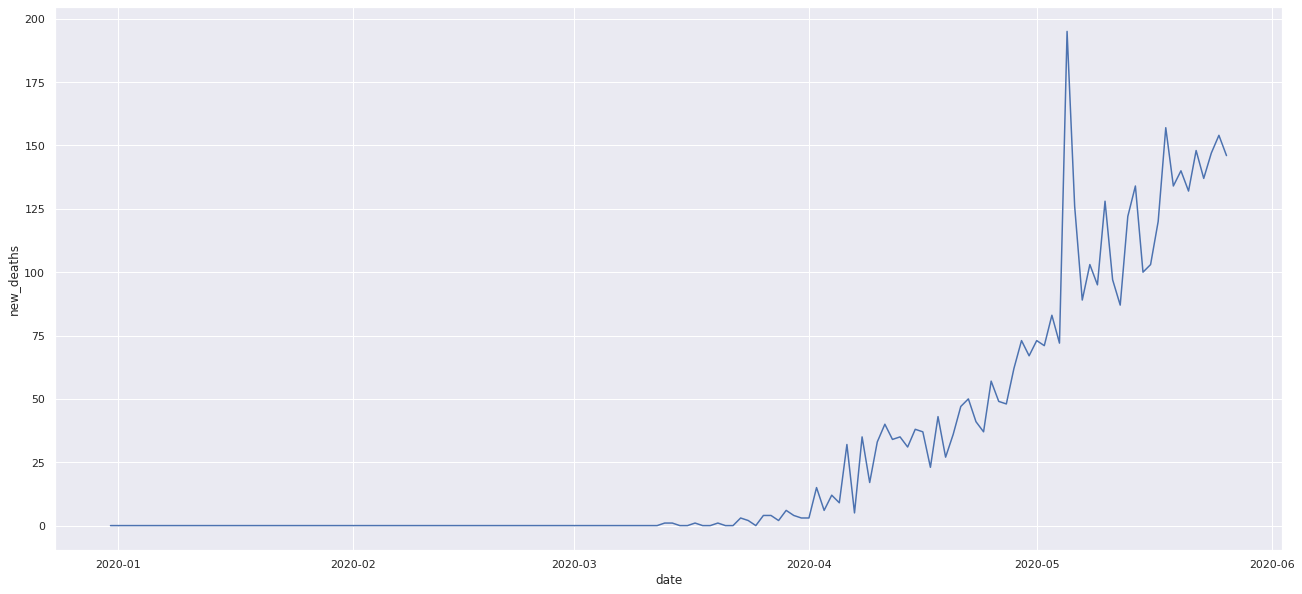

In [113]:
plt.figure(figsize=(22,10))
fig=sns.lineplot(x="date", y="new_deaths",data=data)
plt.show()

- We can clearly see that the number of new deaths reported in a day has increased continuously.
- Presently around 150 deaths are being reported each day.

## Let's try to predict the number of new cases in the coming days

### Checking for stationarity

In [0]:
new_cases=pd.Series(list(data['new_cases']),index=data['date'])

In [115]:
new_cases.tail()

date
2020-05-22    6088
2020-05-23    6654
2020-05-24    6767
2020-05-25    6977
2020-05-26    6535
dtype: int64

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

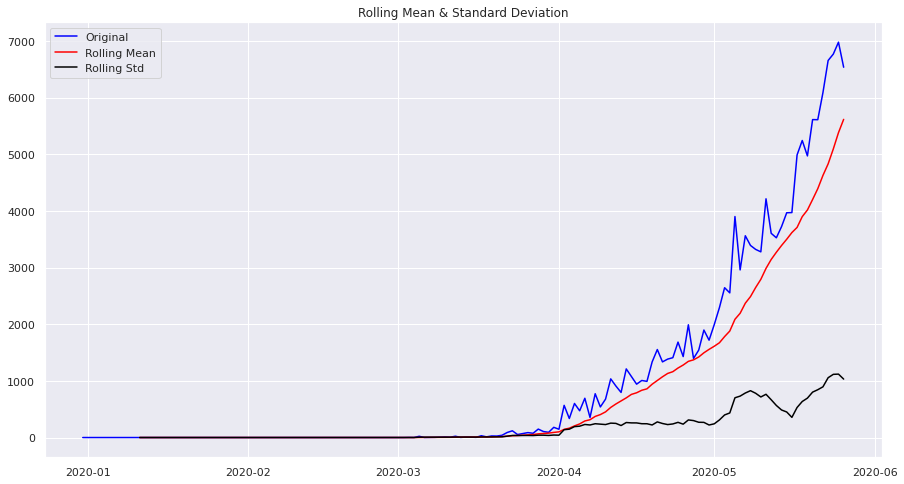

Results of Dickey-Fuller Test:
Test Statistic                   6.057092
p-value                          1.000000
#Lags Used                      11.000000
Number of Observations Used    135.000000
Critical Value (1%)             -3.479743
Critical Value (5%)             -2.883198
Critical Value (10%)            -2.578320
dtype: float64


In [117]:
test_stationarity(new_cases)

- Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series.
- The test statistic is way more than the critical values, indicating that the series is non-stationary.

### Eliminating trend

#### Log transform

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


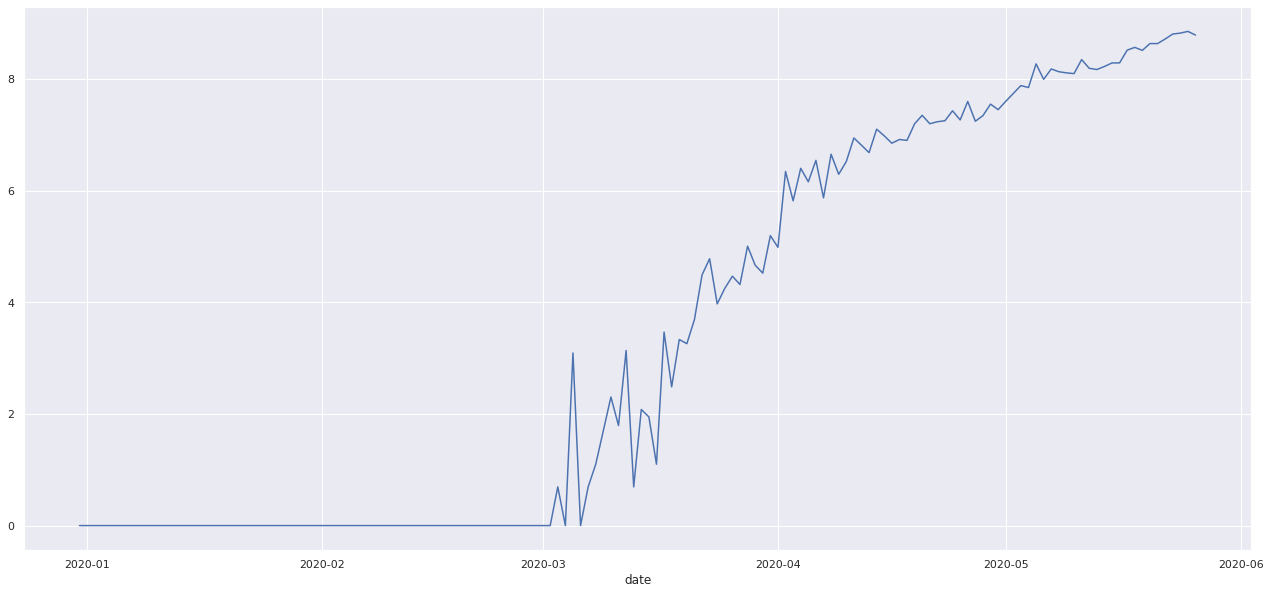

In [118]:
new_cases_log = np.log(new_cases)
new_cases_log=new_cases_log.replace([-np.inf,np.inf],0)
plt.figure(figsize=(22,10))
fig=sns.lineplot(x=new_cases_log.index,y=new_cases_log)
plt.show()

#### Moving average

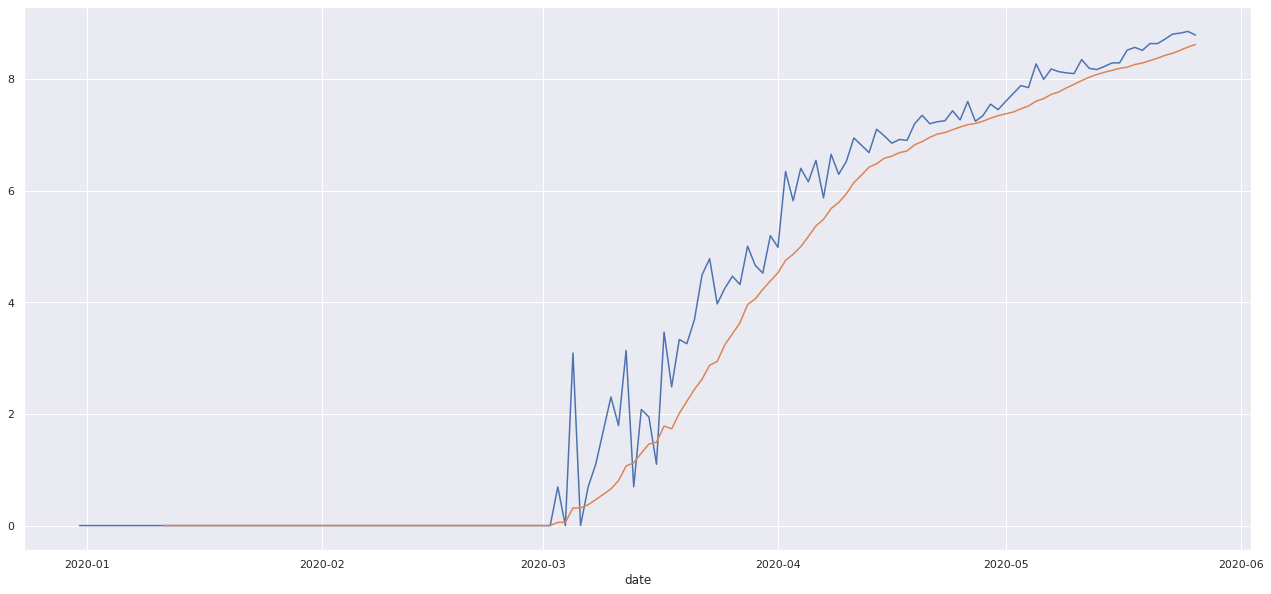

In [119]:
moving_avg = new_cases_log.rolling(window=12).mean()
plt.figure(figsize=(22,10))
sns.lineplot(x=new_cases_log.index,y=new_cases_log)
sns.lineplot(x=moving_avg.index,y=moving_avg)
plt.show()

- The red line shows the rolling mean. Lets subtract this from the original series. Since we are taking average of last 12 values, rolling mean is not defined for first 11 values.

In [120]:
ts_log_moving_avg_diff = new_cases_log - moving_avg
ts_log_moving_avg_diff.head(12)

date
2019-12-31    NaN
2020-01-01    NaN
2020-01-02    NaN
2020-01-03    NaN
2020-01-04    NaN
2020-01-05    NaN
2020-01-06    NaN
2020-01-07    NaN
2020-01-08    NaN
2020-01-09    NaN
2020-01-10    NaN
2020-01-11    0.0
dtype: float64

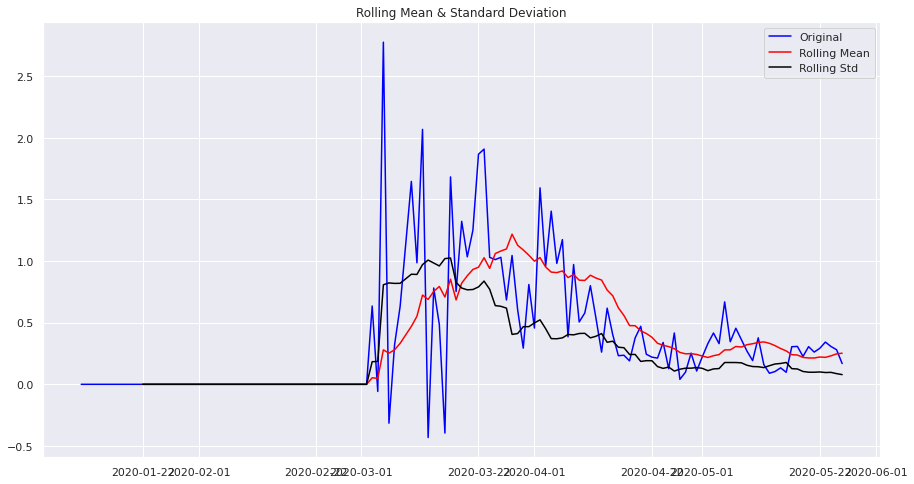

Results of Dickey-Fuller Test:
Test Statistic                  -1.285320
p-value                          0.635861
#Lags Used                      11.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


In [121]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

- This looks like a much better series but it is still not stationary as the test statistic is greater than the all the critical values.

#### Exponential moving average

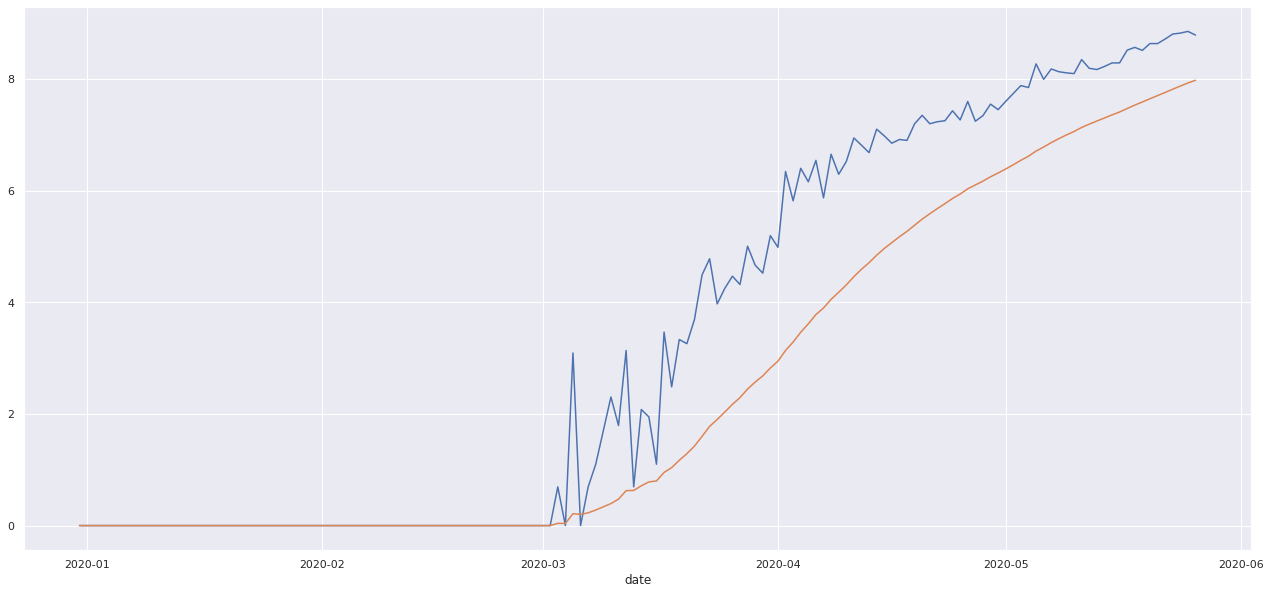

In [122]:
expwighted_avg = new_cases_log.ewm(halflife=12).mean()
plt.figure(figsize=(22,10))
sns.lineplot(x=new_cases_log.index,y=new_cases_log)
sns.lineplot(x=expwighted_avg.index,y=expwighted_avg)
plt.show()

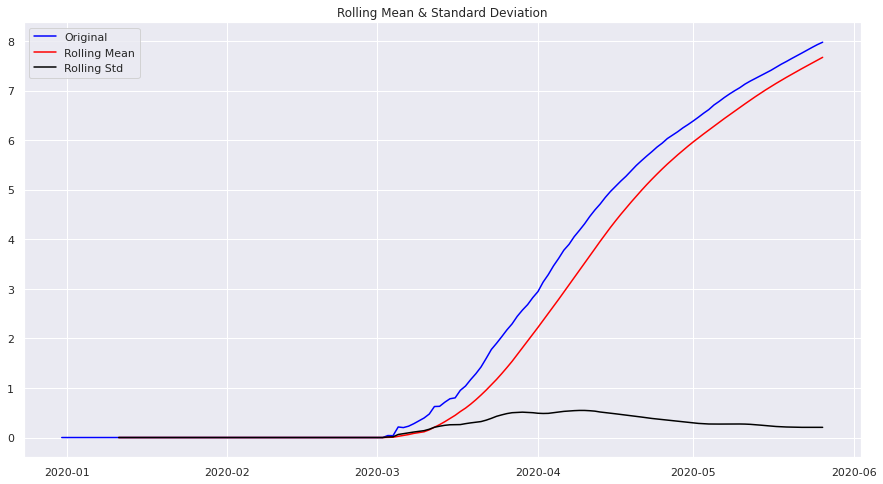

Results of Dickey-Fuller Test:
Test Statistic                  -1.652103
p-value                          0.455944
#Lags Used                      11.000000
Number of Observations Used    135.000000
Critical Value (1%)             -3.479743
Critical Value (5%)             -2.883198
Critical Value (10%)            -2.578320
dtype: float64


In [123]:
expwighted_avg.dropna(inplace=True)
test_stationarity(expwighted_avg)

- The series is still not stationary.

#### Differencing

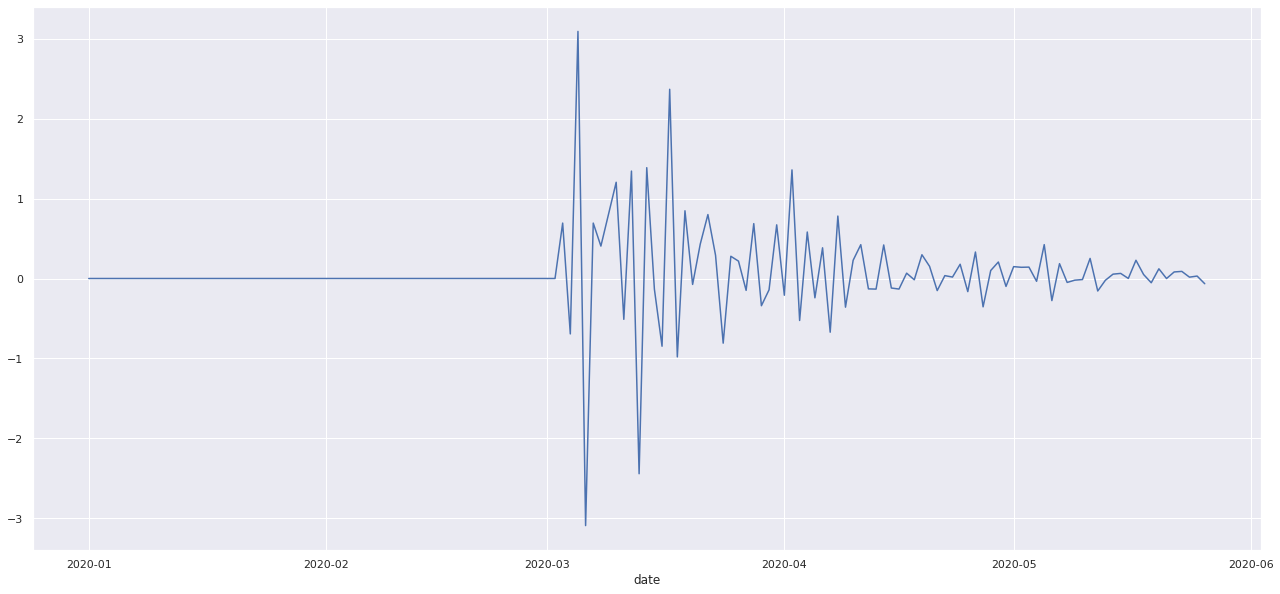

In [124]:
ts_log_diff = new_cases_log - new_cases_log.shift(1)
plt.figure(figsize=(22,10))
sns.lineplot(x=ts_log_diff.index,y=ts_log_diff)
plt.show()

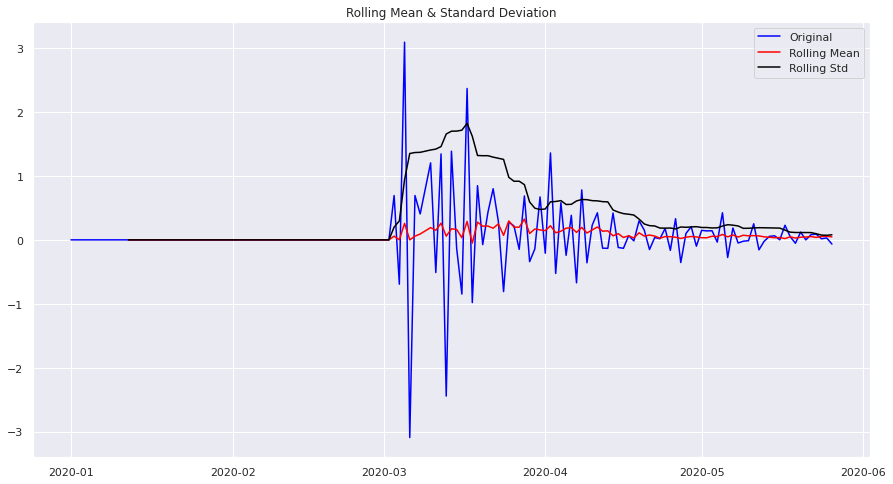

Results of Dickey-Fuller Test:
Test Statistic                  -1.704384
p-value                          0.428855
#Lags Used                      13.000000
Number of Observations Used    132.000000
Critical Value (1%)             -3.480888
Critical Value (5%)             -2.883697
Critical Value (10%)            -2.578586
dtype: float64


In [125]:
ts_log_diff=ts_log_diff.replace([-np.inf,np.inf],np.nan)
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff.dropna())

- Now we can see that we've got a constant mean but the standard deviation is yet not constant and even the test statistic is not significant enough to conclude that the series is stationary.

#### Decomposing

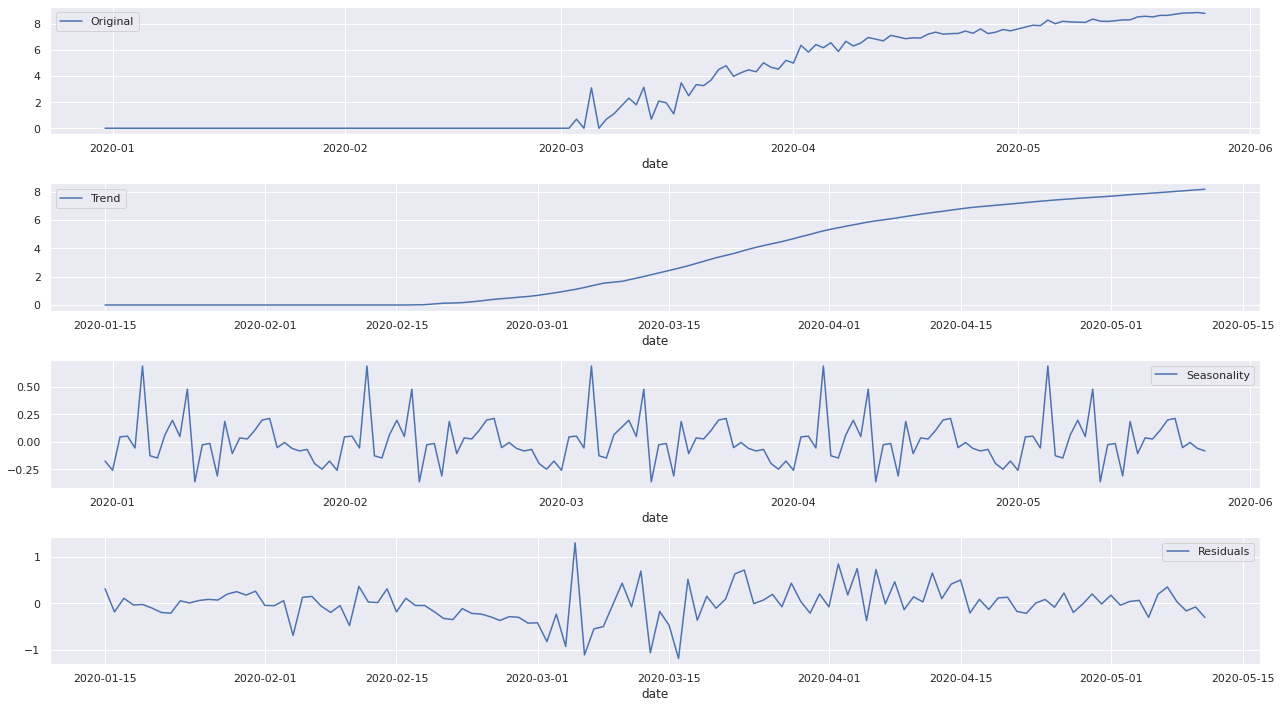

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose
new_cases_log=new_cases_log.replace([-np.inf,np.inf],np.nan)
new_cases_log.dropna(inplace=True)
decomposition = seasonal_decompose(new_cases_log,freq=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(18,10))
plt.subplot(411)
sns.lineplot(x=new_cases_log.index,y=new_cases_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
sns.lineplot(x=trend.index,y=trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
sns.lineplot(x=seasonal.index,y=seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
sns.lineplot(x=residual.index,y=residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

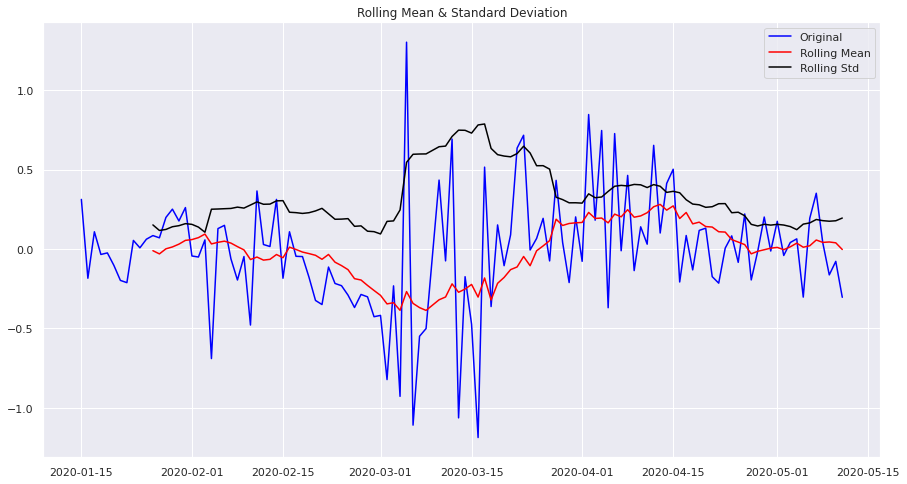

Results of Dickey-Fuller Test:
Test Statistic                  -1.339736
p-value                          0.610803
#Lags Used                      11.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64


In [127]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

- The Dickey-Fuller test statistic is lower than the 1% critical value. So this timeseries is very close to stationary.

###  Forecasting a Time Series

In [0]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [129]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


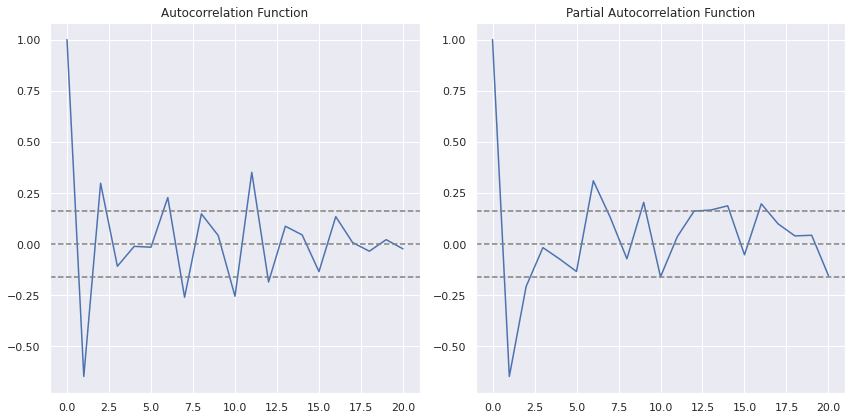

In [130]:
#Plot ACF: 
plt.figure(figsize=(12,6))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#### AR Model

In [0]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 26.0001')

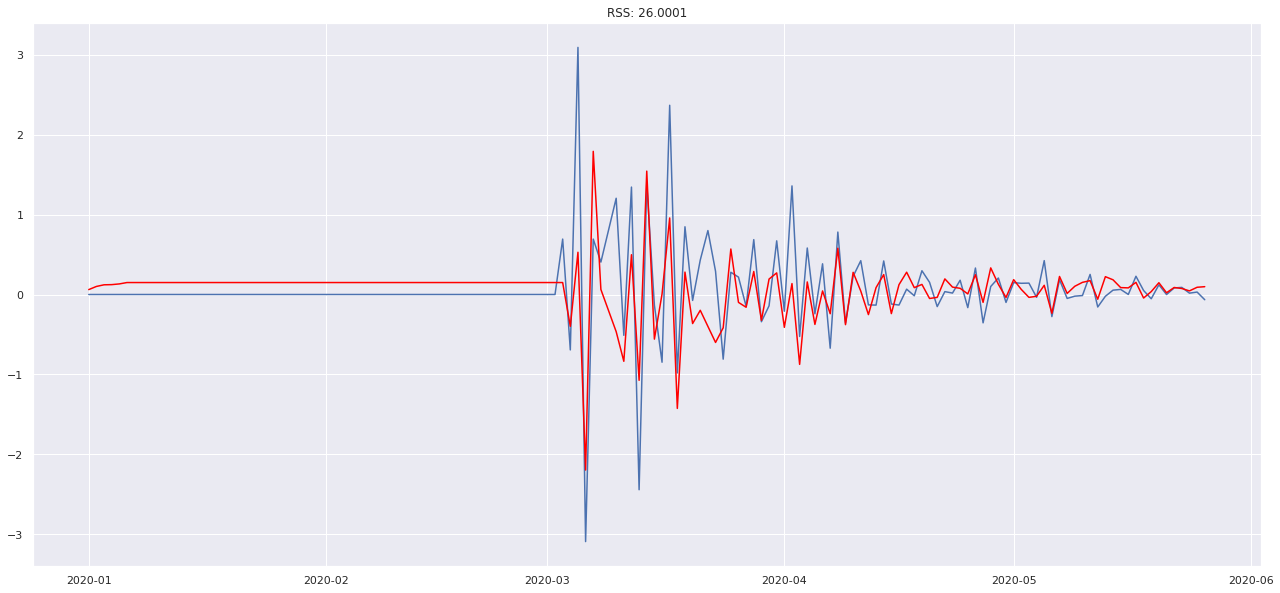

In [132]:
model = ARIMA(new_cases_log, order=(5, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(22,10))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
#seasonal_order=(7,1,7,1)

#### MA Model

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 29.7347')

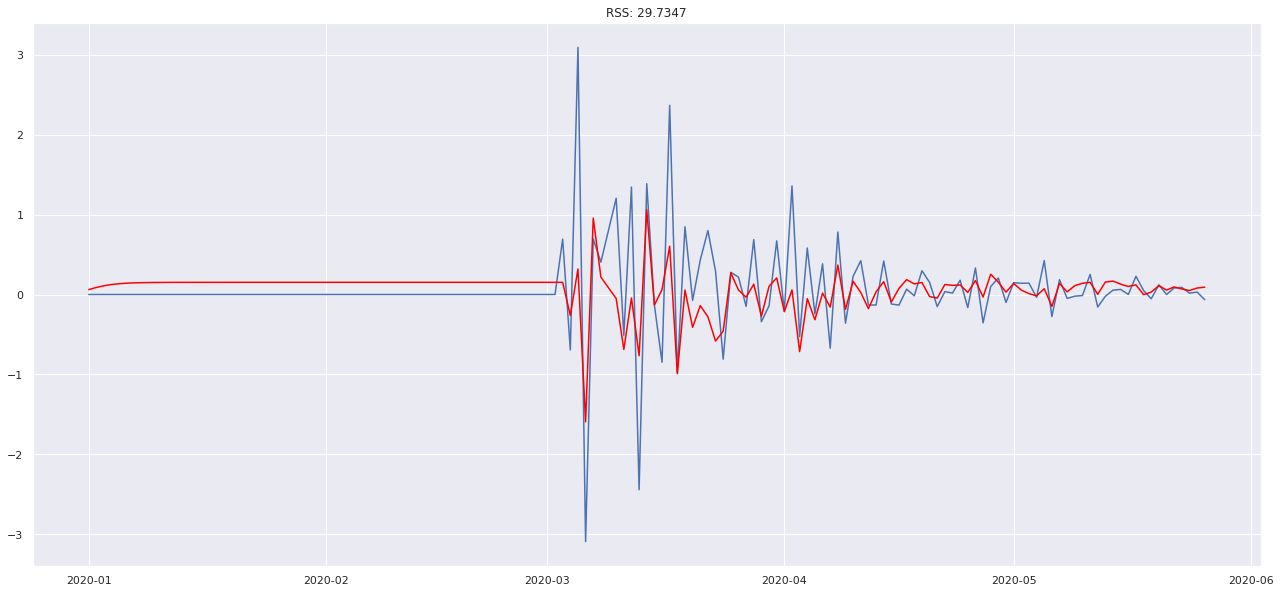

In [133]:
model = ARIMA(new_cases_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1,start_params=(0,0))  
plt.figure(figsize=(22,10))
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

#### Combined Model - ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 26.0001')

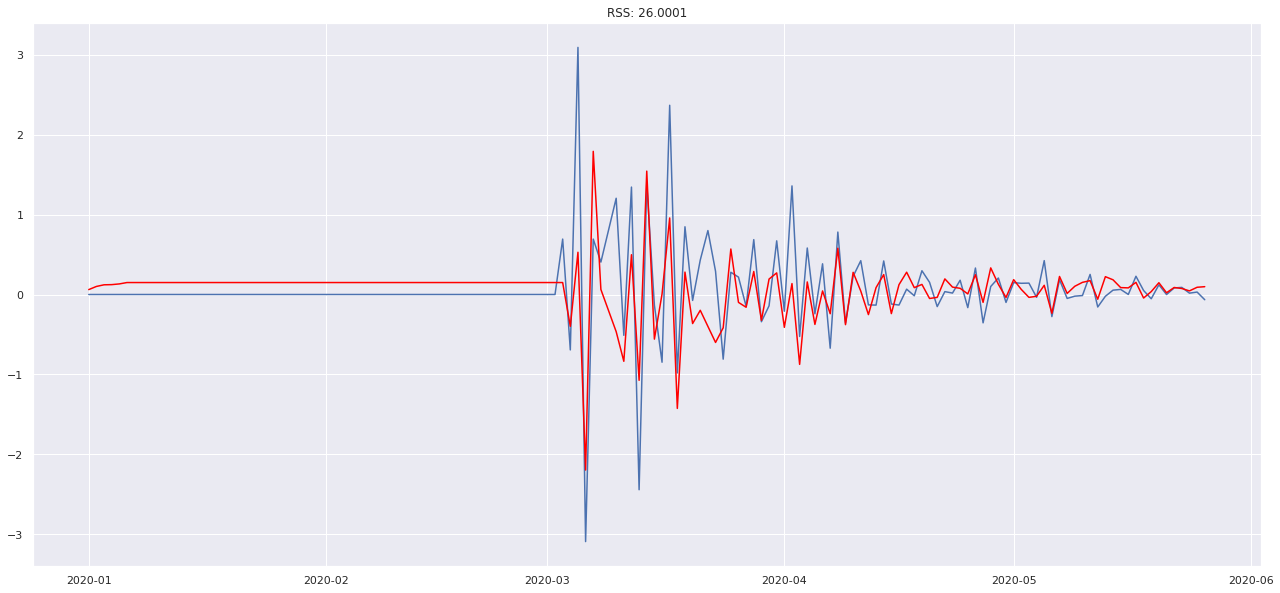

In [134]:
model = ARIMA(new_cases_log, order=(5, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.figure(figsize=(22,10))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

#### Taking it back to original scale

In [135]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

date
2020-01-01    0.061263
2020-01-02    0.100719
2020-01-03    0.121324
2020-01-04    0.123427
2020-01-05    0.132408
dtype: float64

In [136]:
predictions_ARIMA_log = pd.Series(new_cases_log, index=new_cases_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff,fill_value=0)
predictions_ARIMA_log.tail()

date
2020-05-22    8.801725
2020-05-23    8.878028
2020-05-24    8.865033
2020-05-25    8.940783
2020-05-26    8.882764
dtype: float64

Text(0.5, 1.0, 'RMSE: 251.0751')

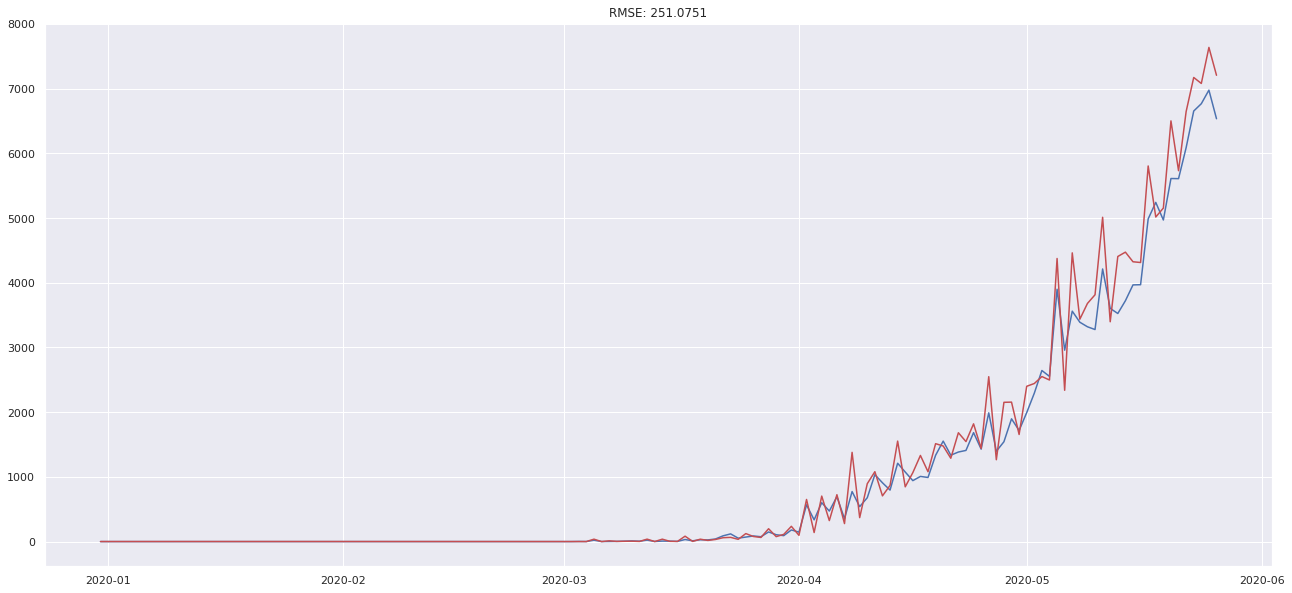

In [137]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(22,10))
plt.plot(new_cases,color='b')
plt.plot(predictions_ARIMA,color='r')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-new_cases)**2)/len(new_cases)))

- Thus we can see that our model is able to find the underlying pattern of the data and has traced the actual values pretty well.

#### Forecast for the coming month - ARIMA

In [138]:
len(results_ARIMA.forecast(steps=35)[0])

35

In [0]:
till_july=[]
for i in range(0,35):
    date=dt.datetime.today() + dt.timedelta(days=i)
    date=date.date()
    date=pd.to_datetime(date)
    till_july.append(date)

In [140]:
len(till_july)

35

In [0]:
till_july=pd.Series(results_ARIMA.forecast(steps=35)[0],index=till_july)

In [0]:
predictions=predictions_ARIMA_log.append(till_july)
predictions=np.exp(predictions)

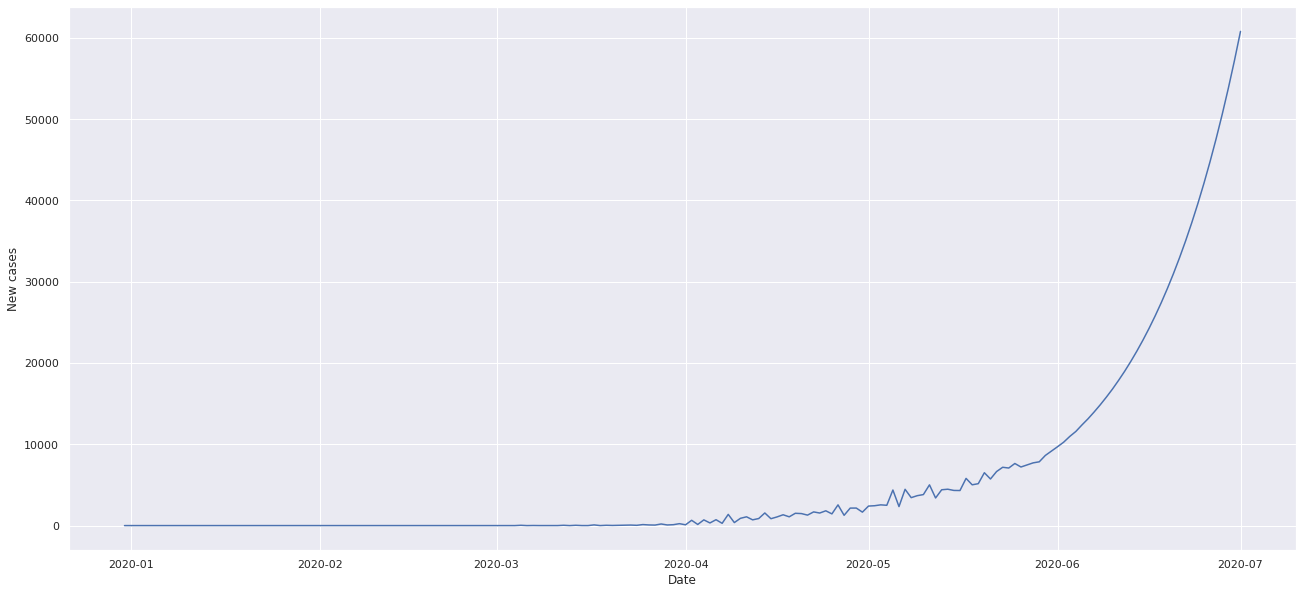

In [143]:
plt.figure(figsize=(22,10))
fig=sns.lineplot(x=predictions.index,y=predictions)
fig.set(xlabel='Date',ylabel='New cases')
plt.show()

- Our model indicates that by the end of June, the number of cases reported in a single day could be as high as 50k, which seems to be wrong.
- It's based on an assumption that testing in the coming month should increase at the same rate as it has been in the last month.
- Our hospitals should be prepared to handle such heavy inflow of patients.
- The problem with ARIMA model here is that it cannot capture the seasonal component and thus predicts average values or basically captures the trend.

#### Final Model - SARIMAX

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5, 1.0, 'RMSE: 172.7967')

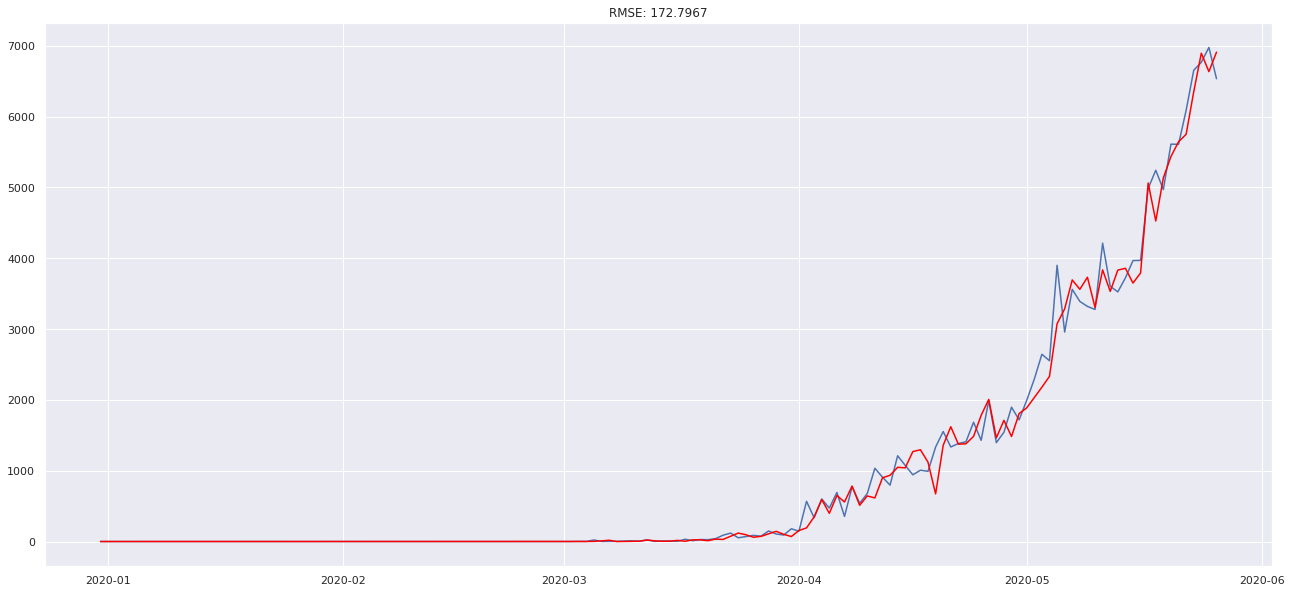

In [151]:
model = SARIMAX(new_cases, order=(5, 1, 0),seasonal_order=(5,1,0,2))  
results_SARIMAX = model.fit(disp=-1)  
plt.figure(figsize=(22,10))
plt.plot(new_cases)
plt.plot(results_SARIMAX.fittedvalues, color='red')
plt.title('RMSE: %.4f'% np.sqrt(sum((results_SARIMAX.fittedvalues-new_cases)**2)/len(new_cases)))

- The advantage of SARIMAX over ARIMA is that it can capture the trend as well as seasonal components.
- Thus it can work with non-stationary series perfectly, though ARIMA also can work with non-stationary series but it can't capture the seasonality component so it's better to provide it a stationary series.
- This model performs the best out of all the previous ones with an RMSE of 172.79.

#### Forecast for the coming month - SARIMAX

In [0]:
till_july=[]
for i in range(0,35):
    date=dt.datetime.today() + dt.timedelta(days=i)
    date=date.date()
    date=pd.to_datetime(date)
    till_july.append(date)

In [148]:
till_july=pd.Series(list(results_SARIMAX.forecast(steps=35)),index=till_july)
till_july=new_cases.append(till_july)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


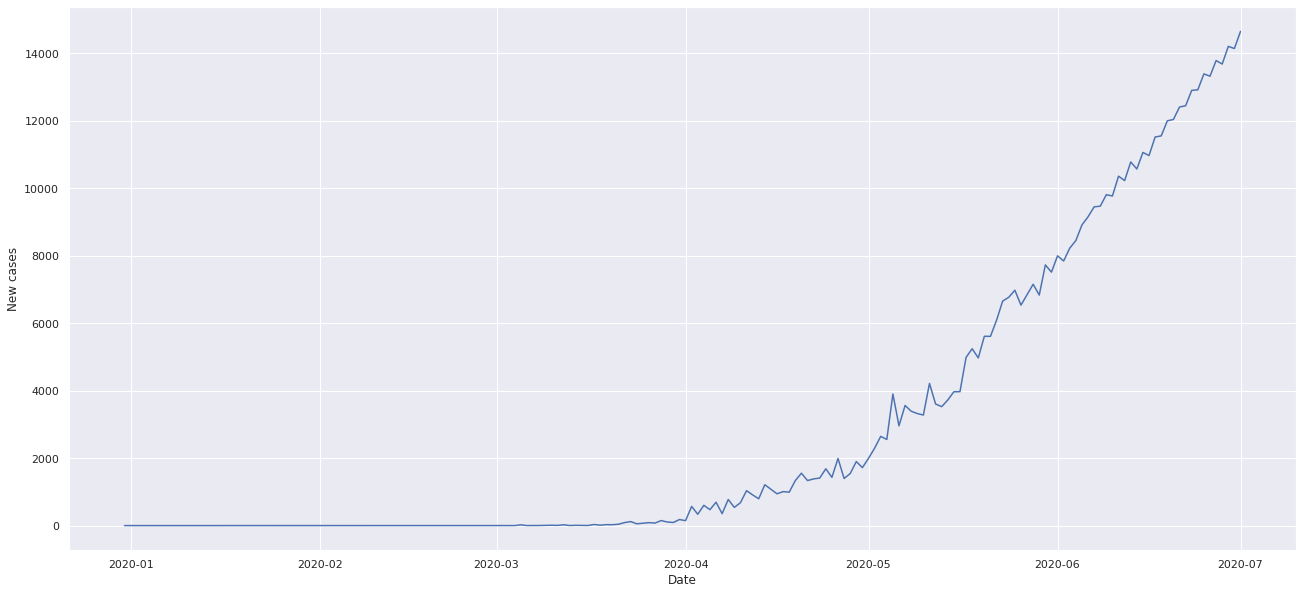

In [149]:
plt.figure(figsize=(22,10))
fig=sns.lineplot(x=till_july.index,y=till_july)
fig.set(xlabel='Date',ylabel='New cases')
plt.show()

- This seems to be a far more feasible forecast than the one predicted by ARIMA.
- Our model indicates that by the end of June, the number of cases reported in a single day could be around 14k.
- It's based on an assumption that testing in the coming month should increase at the same rate as it has been in the last month.